In [1]:
import pandas as pd
import numpy as np
from rfpimp import *
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from fastai.imports import *

from matplotlib import pyplot as plt
import glob2 as glob
from sklearn.preprocessing import LabelEncoder, Imputer, StandardScaler
from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.ensemble import forest
from sklearn.tree import export_graphviz

In [2]:

# size_2015 = pd.concat([pd.read_csv(f) for f in glob.glob('Past3years/size_2015*.csv')], ignore_index=True)
# trip_2015 = pd.concat([pd.read_csv(f) for f in glob.glob('Past3years/trip_2015*.csv')], ignore_index = True)

# size_2016 = pd.concat([pd.read_csv(f) for f in glob.glob('Past3years/size_2016*.csv')], ignore_index=True)
# trip_2016 = pd.concat([pd.read_csv(f) for f in glob.glob('Past3years/trip_2016*.csv')], ignore_index = True)

size_2017 = pd.concat([pd.read_csv(f) for f in glob.glob('Past3years/size_2017*.csv')], ignore_index=True)
trip_2017 = pd.concat([pd.read_csv(f) for f in glob.glob('Past3years/trip_2017*.csv')], ignore_index = True)

/home/lubuntu/anaconda3/envs/project/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (26,39,65,73) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
/home/lubuntu/anaconda3/envs/project/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (65) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


Many of the ID codes are messed up and aren't actually numbers...they end in XX instead. We will make these into NaN

In [3]:
ids=[]
for idno in trip_2017.ID_CODE:
    try: ids.append(int(idno))
    except: ids.append(np.nan)

In [4]:
trip_2017['new_id']=ids
sum(trip_2017.new_id.isnull())

68

In [16]:
# to_drop = []
# for row in trip_2017.iterrows():
#     print(row)
#     #     try: int(row)
# #     except:
# #         to_drop.append(row)

In [17]:

# x = 0
# for items in size_2015: 
#     print(f'{items} {size_2015[items].dtype}')
#     x+=1
# print()
# for items in trip_2015: 
#     print(f'{items} {trip_2015[items].dtype}')
#     x+=1

In [18]:
# # trip_2016.ID_CODE.astype(int, errors='ignore')
# # trip_2016.month.dtype


# def try_float(x):
#     try:
#         float(x)
#         return True
#     except:
#         return False


# ##make a function that will look for any data that can be made an int and do it, otherwise drop it
# # trip_2016.iterrows()

# # def id_fixer(df):
# #     for row in df.iterrows():
# #         try: int(df.ID_CODE[row])
# #         except: row=np.nan

# # id_fixer(trip_2016)

In [65]:
# trip_2015 = pd.concat([pd.read_csv(f, dtype={'ID_CODE': np.int64}) for f in glob.glob('Past3years/trip_2015*.csv')], ignore_index = True)

In [66]:
# print(f'size columns are {size.columns}')
# print(f'trip columns are {trip.columns}')

# data_2015 = pd.merge(size_2015, trip_2015, how='inner', on=['ID_CODE','AREA_X','ST','SUB_REG','WAVE','YEAR'])

## Choose the columns that aren't obviously cheating:


In [5]:
size_cols = ['AREA_X', 'ID_CODE', 'MODE_FX', 'ST', 'SUB_REG', 'WAVE', 'YEAR', 'kod', 'common'].copy()
trip_cols = ['prim1_common', 'prim2_common', 'AREA', 'BOAT_HRS', 'CNTRBTRS','CNTY','CNTY_RES','COASTAL','DIST',
            'FFDAYS12', 'FFDAYS2', 'GEAR', 'HRSF', 'new_id','MODE_F','month','new_list','PARTY',
            'PVT_RES','REG_RES','ST_RES' ].copy()

In [6]:
size2017 = size_2017[size_cols].copy()
trip2017 = trip_2017[trip_cols].copy()


In [31]:
# trip2017.ID_CODE

In [7]:
merged = pd.merge(size2017,trip2017,how='inner', left_on=['ID_CODE'], right_on=['new_id'])

In [8]:
print(sum(merged.common.isnull()))
print(len(merged.common))

35662
176809


Drop the fish that you don't have any name for. We can't use these for training.

In [9]:
mask = merged.common.isnull()
data = merged[mask==False]

fill the NA values of "primary fish sought" using "NONE" for NA values

In [10]:
data.prim1_common.fillna(value='NONE', inplace=True)

/home/lubuntu/anaconda3/envs/project/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [11]:
data.shape

(141147, 30)

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AREA_X,141147.0,3.284158e+00,1.637909e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00
ID_CODE,141147.0,1.611525e+15,2.192002e+14,1.000920e+15,1.563120e+15,1.723420e+15,1.764520e+15,2.771420e+15
MODE_FX,141147.0,5.437905e+00,1.439681e+00,3.000000e+00,4.000000e+00,5.000000e+00,7.000000e+00,7.000000e+00
ST,141147.0,2.469559e+01,1.386949e+01,1.000000e+00,1.200000e+01,2.500000e+01,3.700000e+01,5.100000e+01
SUB_REG,141147.0,5.559140e+00,1.162565e+00,4.000000e+00,4.000000e+00,6.000000e+00,7.000000e+00,7.000000e+00
WAVE,141147.0,3.856122e+00,1.249568e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
YEAR,141147.0,2.017000e+03,0.000000e+00,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03
BOAT_HRS,83618.0,6.805287e+00,3.665669e+00,1.000000e+00,4.500000e+00,6.500000e+00,8.500000e+00,9.990000e+01
CNTRBTRS,141147.0,2.238546e+00,1.959931e+00,0.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,2.000000e+01
CNTY,141147.0,7.909965e+01,1.541846e+02,1.000000e+00,1.100000e+01,3.700000e+01,8.700000e+01,8.100000e+02


To DO: FILLNA for new_list (is the vehicle on a list?)
FILLNA FOR PARTY
FILLNA FOR HRSF
FILLNA FOR GEAR, BOAT HRS

This should all be taken care of by proc_df

In [14]:
data.head()

,AREA_X,ID_CODE,MODE_FX,ST,SUB_REG,WAVE,YEAR,kod,common,prim1_common,...,GEAR,HRSF,new_id,MODE_F,month,new_list,PARTY,PVT_RES,REG_RES,ST_RES
9,5,1748920170908007,3,9,4,5,2017,we,ATLANTIC SILVERSIDE,NONE,...,3.0,6.0,1.748920e+15,1.0,9,NaN,NaN,1.0,4.0,9.0
13,5,1748920170927002,3,9,4,5,2017,wd,ATLANTIC MENHADEN,BLUEFISH,...,1.0,8.0,1.748920e+15,1.0,9,NaN,NaN,1.0,4.0,9.0
14,5,1748920170927002,3,9,4,5,2017,wd,ATLANTIC MENHADEN,BLUEFISH,...,1.0,8.0,1.748920e+15,1.0,9,NaN,NaN,1.0,4.0,9.0
15,5,1748920170927002,3,9,4,5,2017,wd,ATLANTIC MENHADEN,BLUEFISH,...,1.0,8.0,1.748920e+15,1.0,9,NaN,NaN,1.0,4.0,9.0
16,5,1748920170927002,3,9,4,5,2017,wd,ATLANTIC MENHADEN,BLUEFISH,...,1.0,8.0,1.748920e+15,1.0,9,NaN,NaN,1.0,4.0,9.0


In [15]:
# import seaborn as sns
# sns.heatmap(correlation,square = True,  vmax=0.8)

Combine the trip and species data for each year

In [34]:
# data_2015 = pd.concat([size_2015, trip_2015], join='inner', on=['ID_CODE','AREA_X','ST','SUB_REG','WAVE','YEAR','kod'])
# data_2016 = pd.merge(size_2016, trip_2016, how='inner', on=['ID_CODE','AREA_X','ST','SUB_REG','WAVE','YEAR','kod'])
# data_2017 = pd.merge(size_2017, trip_2017, how='inner', on=['ID_CODE','AREA_X','ST','SUB_REG','WAVE','YEAR','kod'])

Combine the years

In [35]:
# data_all = [data_2]

In [36]:
# size_2015.tail()

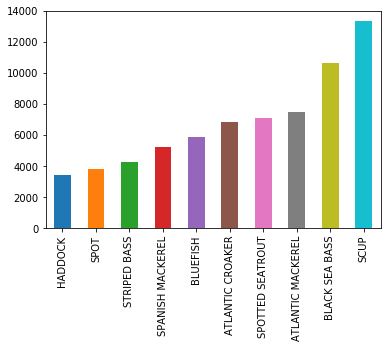

In [16]:
counts = merged['common'].value_counts()
counts.sort_values(inplace=True)

counts[-10:].plot(kind='bar')

In [17]:
fish = counts.sum()
rates = [x/fish*100 for x in counts]
rates[-10:]

[2.422297321232474,
 2.731903618213636,
 3.020963959559891,
 3.714567082545148,
 4.171537475114597,
 4.836801348948259,
 5.018172543518459,
 5.327070359270831,
 7.54532508661183,
 9.446888704683769]

In [39]:
# size_cols = ['ID_CODE', 'kod', 'common']
# trip_cols = ['ID_CODE', 'prim1_common', 'CNTRBTRS', 'COUNTY', 'AREA_X']

# small_size = size[size_cols].copy()
# small_trip = trip[trip_cols].copy()

In [40]:
# small_data = pd.merge(small_size, small_trip, how='inner', on='ID_CODE')

In [48]:
# mask = small_data.common.isnull()
# data = small_data[mask==False]

In [49]:
# ~mask would give inverse of mask boolean
# data.ID_CODE

# lister = [1038919950113003,1038919950113003]


In [50]:
# data.shape

(118039, 39)

In [18]:
na_counts=[]
for column in data:
    na_counts.append(sum(data[column].isna()))

In [19]:
na_counts

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 28605,
 0,
 0,
 107036,
 0,
 57529,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 26,
 26,
 0,
 0,
 0,
 72753,
 13770,
 0,
 0,
 0]

In [57]:
# data['prim1_common'].fillna('Anything', inplace=True)

In [51]:
a= 1038919950113003

n= a%(10**11)
n

19950113003

In [52]:
n//10**3

19950113

In [20]:
def train_cats(df):
    """Change any columns of strings in a panda's dataframe to a column of
    categorical values. This applies the changes inplace.
    Parameters:
    -----------
    df: A pandas dataframe. Any columns of strings will be changed to
        categorical values.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    note the type of col2 is string
    >>> train_cats(df)
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    now the type of col2 is category
    """
    for n,c in df.items():
        if is_string_dtype(c): df[n] = c.astype('category').cat.as_ordered()

In [21]:
def proc_df(df, y_fld=None, skip_flds=None, ignore_flds=None, do_scale=False, na_dict=None,
            preproc_fn=None, max_n_cat=None, subset=None, mapper=None):
    """ proc_df takes a data frame df and splits off the response variable, and
    changes the df into an entirely numeric dataframe. For each column of df 
    which is not in skip_flds nor in ignore_flds, na values are replaced by the
    median value of the column.
    Parameters:
    -----------
    df: The data frame you wish to process.
    y_fld: The name of the response variable
    skip_flds: A list of fields that dropped from df.
    ignore_flds: A list of fields that are ignored during processing.
    do_scale: Standardizes each column in df. Takes Boolean Values(True,False)
    na_dict: a dictionary of na columns to add. Na columns are also added if there
        are any missing values.
    preproc_fn: A function that gets applied to df.
    max_n_cat: The maximum number of categories to break into dummy values, instead
        of integer codes.
    subset: Takes a random subset of size subset from df.
    mapper: If do_scale is set as True, the mapper variable
        calculates the values used for scaling of variables during training time (mean and standard deviation).
    Returns:
    --------
    [x, y, nas, mapper(optional)]:
        x: x is the transformed version of df. x will not have the response variable
            and is entirely numeric.
        y: y is the response variable
        nas: returns a dictionary of which nas it created, and the associated median.
        mapper: A DataFrameMapper which stores the mean and standard deviation of the corresponding continuous
        variables which is then used for scaling of during test-time.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    note the type of col2 is string
    >>> train_cats(df)
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    now the type of col2 is category { a : 1, b : 2}
    >>> x, y, nas = proc_df(df, 'col1')
    >>> x
       col2
    0     1
    1     2
    2     1
    >>> data = DataFrame(pet=["cat", "dog", "dog", "fish", "cat", "dog", "cat", "fish"],
                 children=[4., 6, 3, 3, 2, 3, 5, 4],
                 salary=[90, 24, 44, 27, 32, 59, 36, 27])
    >>> mapper = DataFrameMapper([(:pet, LabelBinarizer()),
                          ([:children], StandardScaler())])
    >>>round(fit_transform!(mapper, copy(data)), 2)
    8x4 Array{Float64,2}:
    1.0  0.0  0.0   0.21
    0.0  1.0  0.0   1.88
    0.0  1.0  0.0  -0.63
    0.0  0.0  1.0  -0.63
    1.0  0.0  0.0  -1.46
    0.0  1.0  0.0  -0.63
    1.0  0.0  0.0   1.04
    0.0  0.0  1.0   0.21
    """
    if not ignore_flds: ignore_flds=[]
    if not skip_flds: skip_flds=[]
    if subset: df = get_sample(df,subset)
    else: df = df.copy()
    ignored_flds = df.loc[:, ignore_flds]
    df.drop(ignore_flds, axis=1, inplace=True)
    if preproc_fn: preproc_fn(df)
    if y_fld is None: y = None
    else:
        if not is_numeric_dtype(df[y_fld]): df[y_fld] = df[y_fld].cat.codes
        y = df[y_fld].values
        skip_flds += [y_fld]
    df.drop(skip_flds, axis=1, inplace=True)

    if na_dict is None: na_dict = {}
    else: na_dict = na_dict.copy()
    na_dict_initial = na_dict.copy()
    for n,c in df.items(): na_dict = fix_missing(df, c, n, na_dict)
    if len(na_dict_initial.keys()) > 0:
        df.drop([a + '_na' for a in list(set(na_dict.keys()) - set(na_dict_initial.keys()))], axis=1, inplace=True)
    if do_scale: mapper = scale_vars(df, mapper)
    for n,c in df.items(): numericalize(df, c, n, max_n_cat)
    df = pd.get_dummies(df, dummy_na=True)
    df = pd.concat([ignored_flds, df], axis=1)
    res = [df, y, na_dict]
    if do_scale: res = res + [mapper]
    return res

In [22]:
def fix_missing(df, col, name, na_dict):
    """ Fill missing data in a column of df with the median, and add a {name}_na column
    which specifies if the data was missing.
    Parameters:
    -----------
    df: The data frame that will be changed.
    col: The column of data to fix by filling in missing data.
    name: The name of the new filled column in df.
    na_dict: A dictionary of values to create na's of and the value to insert. If
        name is not a key of na_dict the median will fill any missing data. Also
        if name is not a key of na_dict and there is no missing data in col, then
        no {name}_na column is not created.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, np.NaN, 3], 'col2' : [5, 2, 2]})
    >>> df
       col1 col2
    0     1    5
    1   nan    2
    2     3    2
    >>> fix_missing(df, df['col1'], 'col1', {})
    >>> df
       col1 col2 col1_na
    0     1    5   False
    1     2    2    True
    2     3    2   False
    >>> df = pd.DataFrame({'col1' : [1, np.NaN, 3], 'col2' : [5, 2, 2]})
    >>> df
       col1 col2
    0     1    5
    1   nan    2
    2     3    2
    >>> fix_missing(df, df['col2'], 'col2', {})
    >>> df
       col1 col2
    0     1    5
    1   nan    2
    2     3    2
    >>> df = pd.DataFrame({'col1' : [1, np.NaN, 3], 'col2' : [5, 2, 2]})
    >>> df
       col1 col2
    0     1    5
    1   nan    2
    2     3    2
    >>> fix_missing(df, df['col1'], 'col1', {'col1' : 500})
    >>> df
       col1 col2 col1_na
    0     1    5   False
    1   500    2    True
    2     3    2   False
    """
    if is_numeric_dtype(col):
        if pd.isnull(col).sum() or (name in na_dict):
            df[name+'_na'] = pd.isnull(col)
            filler = na_dict[name] if name in na_dict else col.median()
            df[name] = col.fillna(filler)
            na_dict[name] = filler
    return na_dict

In [23]:
def numericalize(df, col, name, max_n_cat):
    """ Changes the column col from a categorical type to it's integer codes.
    Parameters:
    -----------
    df: A pandas dataframe. df[name] will be filled with the integer codes from
        col.
    col: The column you wish to change into the categories.
    name: The column name you wish to insert into df. This column will hold the
        integer codes.
    max_n_cat: If col has more categories than max_n_cat it will not change the
        it to its integer codes. If max_n_cat is None, then col will always be
        converted.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    note the type of col2 is string
    >>> train_cats(df)
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    now the type of col2 is category { a : 1, b : 2}
    >>> numericalize(df, df['col2'], 'col3', None)
       col1 col2 col3
    0     1    a    1
    1     2    b    2
    2     3    a    1
    """
    if not is_numeric_dtype(col) and ( max_n_cat is None or len(col.cat.categories)>max_n_cat):
        df[name] = col.cat.codes+1

In [24]:
train_cats(data)
df, y, nas = proc_df(data, 'common')

/home/lubuntu/anaconda3/envs/project/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [25]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 53000
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(data, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((88147, 34), (88147,), (53000, 34))

In [26]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [27]:
m = RandomForestClassifier(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/home/lubuntu/anaconda3/envs/project/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 2.85 s, sys: 461 ms, total: 3.31 s
Wall time: 2.16 s
[34.75435434190206, 48.38504427438258, 0.7931410030970991, 0.3557924528301887]


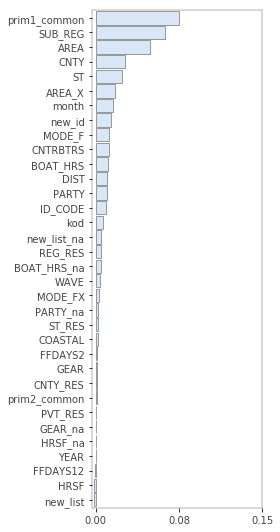

In [28]:
imp = importances(m, X_valid, y_valid, n_samples=-1)
viz = plot_importances(imp)
viz.view()

In [40]:
test = m.predict_proba(porg2)

In [39]:
probs_test_x = X_valid.loc[108660]
porg = array(probs_test_x)
porg2=porg.reshape(1,-1)

In [56]:
corr = merged.corr()


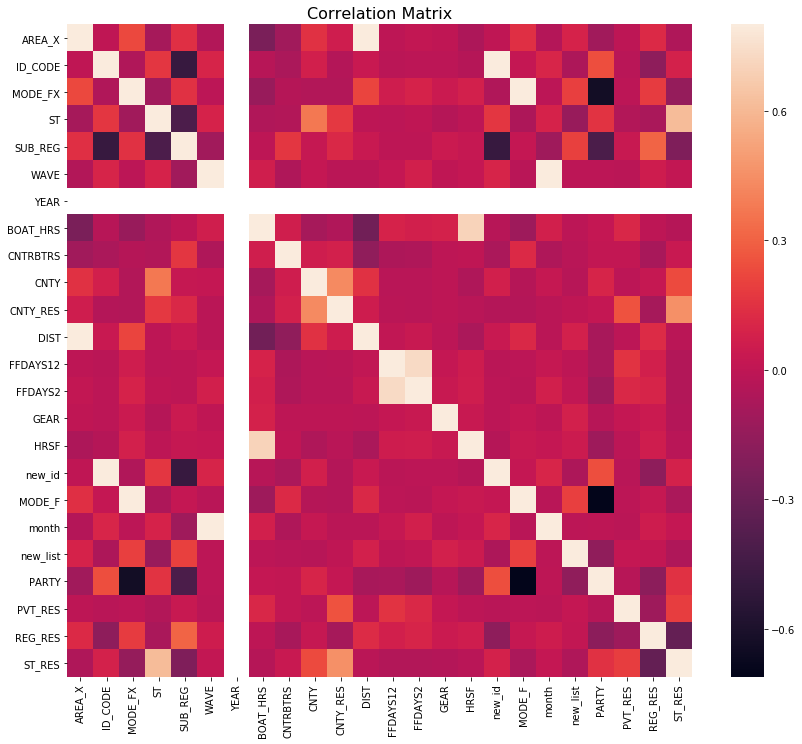

In [58]:
import seaborn as sns
f , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation Matrix',y=1,size=16)

sns.heatmap(corr,square = False,  vmax=0.8)

In [17]:
import pickle 

with open('model.pkl','wb') as pickle_file:
    pickle.dump(m, pickle_file)

In [18]:
X_train.columns

Index(['ID_CODE', 'kod', 'prim1_common', 'CNTRBTRS', 'COUNTY', 'AREA_X'], dtype='object')

In [19]:
X_train.AREA_X

1       1
2       1
3       1
4       1
5       1
9       1
10      1
11      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
30      1
31      1
32      1
39      1
40      1
45      1
       ..
5458    5
5459    5
5460    5
5461    5
5462    5
5463    5
5467    5
5468    5
5469    5
5470    5
5473    5
5475    4
5478    5
5482    4
5483    4
5484    4
5485    4
5486    4
5487    4
5488    4
5489    4
5490    4
5491    4
5492    4
5493    4
5494    4
5495    4
5496    4
5503    3
5504    3
Name: AREA_X, Length: 4267, dtype: int64

In [23]:
print(raw_train.common.cat.codes.head(20))
print(raw_train.common.head(20))

1     55
2     55
3     55
4     55
5     55
9     55
10    55
11    55
13    55
14    40
15    55
16    55
17    55
18    55
19    55
20    55
21    55
23    55
24    55
25    55
dtype: int16
1       GULF KINGFISH
2       GULF KINGFISH
3       GULF KINGFISH
4       GULF KINGFISH
5       GULF KINGFISH
9       GULF KINGFISH
10      GULF KINGFISH
11      GULF KINGFISH
13      GULF KINGFISH
14    FLORIDA POMPANO
15      GULF KINGFISH
16      GULF KINGFISH
17      GULF KINGFISH
18      GULF KINGFISH
19      GULF KINGFISH
20      GULF KINGFISH
21      GULF KINGFISH
23      GULF KINGFISH
24      GULF KINGFISH
25      GULF KINGFISH
Name: common, dtype: category
Categories (138, object): [ALMACO JACK < ATLANTIC CROAKER < ATLANTIC MENHADEN < ATLANTIC SHARPNOSE SHARK ... WHITEBONE PORGY < YELLOW CHUB < YELLOW JACK < YELLOWTAIL SNAPPER]


In [27]:
data.common.cat.codes.unique()

138

In [26]:
data.common.unique()

[GULF KINGFISH, FLORIDA POMPANO, BLUEFISH, SHEEPSHEAD, HARDHEAD CATFISH, ..., ATLANTIC SHARPNOSE SHARK, DUSKY SHARK, BEARDED BROTULA, LARGEMOUTH BASS, REDEAR SUNFISH]
Length: 138
Categories (138, object): [ALMACO JACK < ATLANTIC CROAKER < ATLANTIC MENHADEN < ATLANTIC SHARPNOSE SHARK ... WHITEBONE PORGY < YELLOW CHUB < YELLOW JACK < YELLOWTAIL SNAPPER]

In [48]:
mapping = pd.DataFrame()
mapping['common_name']=data.common.unique()
mapping['code']=data.common.cat.codes.unique()

In [49]:
mapping.to_csv('name_map.csv', index=False)

In [50]:
mapping.head()

,common_name,code
0,GULF KINGFISH,55
1,FLORIDA POMPANO,40
2,BLUEFISH,23
3,SHEEPSHEAD,106
4,HARDHEAD CATFISH,56


In [55]:
mapping = pd.read_csv('name_map.csv',index_col='common_name')

In [56]:
mapping.head()

,code
common_name,
GULF KINGFISH,55
FLORIDA POMPANO,40
BLUEFISH,23
SHEEPSHEAD,106
HARDHEAD CATFISH,56


In [61]:
mapping.columns

Index(['code'], dtype='object')

In [62]:
mapping.loc['BLUEFISH', 'code']

23

In [63]:
mapping.index

Index(['GULF KINGFISH', 'FLORIDA POMPANO', 'BLUEFISH', 'SHEEPSHEAD',
       'HARDHEAD CATFISH', 'SPOT', 'PINFISH', 'BLACK DRUM', 'SPOTTED SEATROUT',
       'SOUTHERN KINGFISH',
       ...
       'ALMACO JACK', 'SPINNER SHARK', 'BLACKNOSE SHARK', 'BULL SHARK',
       'GLASSEYE SNAPPER', 'ATLANTIC SHARPNOSE SHARK', 'DUSKY SHARK',
       'BEARDED BROTULA', 'LARGEMOUTH BASS', 'REDEAR SUNFISH'],
      dtype='object', name='common_name', length=138)

In [71]:
mapping.loc[mapping['code'] == 23].index


Index(['BLUEFISH'], dtype='object', name='common_name')

In [73]:
x=[204]

In [74]:
x

[204]

In [75]:
x[0]

204